In [1]:
import numpy as np

In [2]:
import matplotlib.pylab as plt

%matplotlib inline

/Users/rok/miniconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [3]:
import fof

In [42]:
# create the arrays
pdt = np.dtype([('pos','f4', 3), ('iGroup', 'i4'), ('iOrder', 'i4')])
nps = 10000
ngs = 5
particles = np.zeros(nps, dtype=pdt)
done_ps = 0
centers = np.random.rand(ngs,3) - .5
for group, center in zip(range(ngs), centers): 
    group_ps = nps/ngs
    if nps - (done_ps + group_ps) < group_ps:
        group_ps = nps - done_ps 
    particles['pos'][done_ps:done_ps+group_ps] = \
        np.random.multivariate_normal(center, [[.001,0,0],[0,.001,0],[0,0,.001]], group_ps)
    done_ps += group_ps
   
particles['iOrder'] = range(nps)

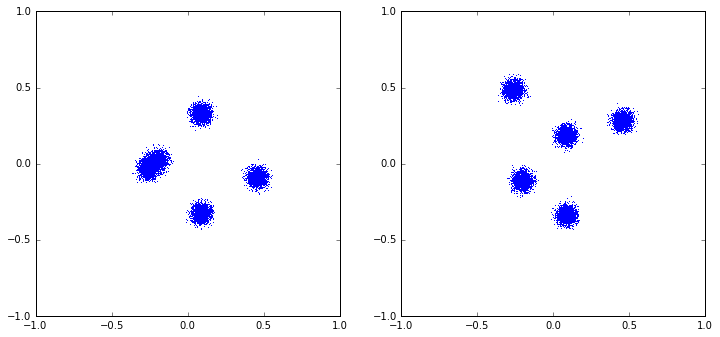

In [43]:
f, axs = plt.subplots(1,2, subplot_kw={'aspect':'equal'}, figsize=(12,12))
axs[0].plot(particles['pos'][:,0], particles['pos'][:,1], ',')
axs[1].plot(particles['pos'][:,0], particles['pos'][:,2], ',')
for ax in axs:
    ax.set_xlim(-1,1); ax.set_ylim(-1,1)

In [53]:
%timeit fof.run(particles, 0.1)

Number of initial groups:  5
Final number of groups:  5
Number of initial groups:  5
Final number of groups:  5
Number of initial groups:  5
Final number of groups:  5
Number of initial groups:  5
Final number of groups:  5
Number of initial groups:  5
Final number of groups:  5
Number of initial groups:  5
Final number of groups:  5
Number of initial groups:  5
Final number of groups:  5
Number of initial groups:  5
Final number of groups:  5
Number of initial groups:  5
Final number of groups:  5
Number of initial groups:  5
Final number of groups:  5
Number of initial groups:  5
Final number of groups:  5
Number of initial groups:  5
Final number of groups:  5
Number of initial groups:  5
Final number of groups:  5
Number of initial groups:  5
Final number of groups:  5
Number of initial groups:  5
Final number of groups:  5
Number of initial groups:  5
Final number of groups:  5
Number of initial groups:  5
Final number of groups:  5
Number of initial groups:  5
Final number of gro

In [51]:
inds = np.where(particles['iGroup'] == 2)

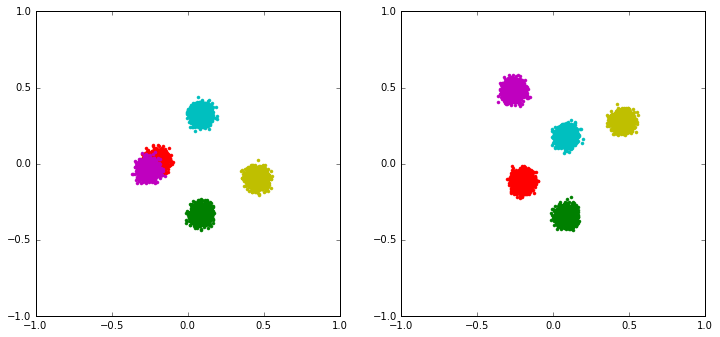

In [52]:
f, axs = plt.subplots(1,2, subplot_kw={'aspect':'equal'}, figsize=(12,12))
for group in range(ngs+1): 
    inds = np.where(particles['iGroup'] == group)[0]
    axs[0].plot(particles['pos'][inds,0], particles['pos'][inds,1], '.')
    axs[1].plot(particles['pos'][inds,0], particles['pos'][inds,2], '.')
for ax in axs:
    ax.set_xlim(-1,1); ax.set_ylim(-1,1)